In [1]:
from oda_api.data_products import PictureProduct
from oda_api.api import DispatcherAPI
from matplotlib import pyplot as plt
from astropy import time as atime
from astropy import units as u
import numpy as np

In [2]:
# This annotated cell is to let ODA know about the input parameters
src_name = "GRB170130A" # oda:AstrophysicalObject
time_start = "2017-01-30T07:14:10.000" # oda:StartTimeISOT
time_stop = "2017-01-30T07:15:55.000" # oda:EndTimeISOT
time_bin_spi = 1 # oda:Float, oda:second
time_bin_polar = 1 # oda:Float, oda:second

In [3]:
# convenience variable for ODA
disp=DispatcherAPI(url='https://www.astro.unige.ch/mmoda//dispatch-data', instrument='mock')

In [4]:
# Actual code to get SPI-ACS lightcurve

par_dict={
    "T1": time_start,
    "T2": time_stop,
    "T_format": "isot",
    "data_level": "ordinary",
    "instrument": "spi_acs",
    "product": "spi_acs_lc",
    "product_type": "Real",
    "src_name": src_name,
    "time_bin": time_bin_spi,
    "time_bin_format": "sec"
}


data_collection_spi = disp.get_product(**par_dict)


please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`


In [5]:
# Query POLAR lightcurve

par_dict={
    "E1_keV": 20.0,
    "E2_keV": 100.0,
    "T1": time_start,
    "T2": time_stop,
    "T_format": "isot",
    "instrument": "polar",
    "product": "polar_lc",
    "product_type": "Real",
    "src_name": src_name,
    "time_bin": time_bin_polar,
    "time_bin_format": "sec"
}

data_collection_polar = disp.get_product(**par_dict)


please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`


## see the query output structure

In [6]:
data_collection_spi.show()

ID=0 prod_name=spi_acs_lc_0_query  meta_data: {'src_name': 'query', 'time_bin': 1.0, 'time': 'TIME', 'rate': 'RATE', 'rate_err': 'ERROR'}



In [7]:
data_collection_spi.spi_acs_lc_0_query.show_meta()

------------------------------
src_name : query
time_bin : 1.0
time : TIME
rate : RATE
rate_err : ERROR
------------------------------


In [8]:
data_collection_spi.spi_acs_lc_0_query.show()

------------------------------
name: None
meta_data dict_keys(['src_name', 'time_bin', 'time', 'rate', 'rate_err'])
number of data units 2
------------------------------
data uniti 0 ,name: Primary
data uniti 1 ,name: RATE


In [9]:
hdu = data_collection_spi.spi_acs_lc_0_query.get_data_unit(1)

In [10]:
sdat = hdu.data

In [11]:
hdu.header

{'BITPIX': 8,
 'DATE-END': '2017-01-30T07:15:19.209',
 'DATE-OBS': '2017-01-30T07:15:19.209',
 'EPHS': '322.568 43.556 80907.1 0.021 0.021 30.0',
 'EXTNAME': 'RATE',
 'GCOUNT': 1,
 'INSTRUME': 'SPI-ACS',
 'MJDREF': 51544.0,
 'NAXIS': 2,
 'NAXIS1': 24,
 'NAXIS2': 105,
 'ONTIME': 105.00006567798555,
 'PCOUNT': 0,
 'PROPHECY': '',
 'TASSIGN': 'SATELLITE',
 'TELESCOP': 'INTEGRAL',
 'TFIELDS': 3,
 'TFORM1': 'D',
 'TFORM2': 'D',
 'TFORM3': 'D',
 'TIMEDEL': 1.0,
 'TIMEREF': 'LOCAL',
 'TIMESYS': 'TT',
 'TIMEUNIT': 's',
 'TIMEZERO': 539075771.6836646,
 'TSTART': 539075719.2086318,
 'TSTOP': 539075824.2086974,
 'TTYPE1': 'TIME',
 'TTYPE2': 'RATE',
 'TTYPE3': 'ERROR',
 'XTENSION': 'BINTABLE'}

In [ ]:
# Get TIMEZERO in UTC because TIMEZERO is in TT for SPI_ACS
# See https://www.astro.unige.ch/integral//support/faq.cgi?DATA-007

spi_timezero_tt = hdu.header['TIMEZERO']*u.s + atime.Time(hdu.header['MJDREF'], format='mjd', scale='tt')
spi_timezero = spi_timezero_tt.utc

spi_timezero.isot

'2017-01-30T07:15:02.500'

In [13]:
spi_time = spi_timezero + sdat['TIME']*u.second

In [14]:
data_collection_polar.show()
# for dd in data_collection_polar._p_list:
#     print(dd)
# print()
# for dd in data_collection_spi._p_list:
#     print(dd)


ID=0 prod_name=polar_lc_0_lc  meta_data: {'src_name': 'lc', 'time_bin': 1.0, 'time': 'time', 'rate': 'rate', 'rate_err': 'rate_err'}

ID=1 prod_name=polar_lc_1  meta_data: 



In [15]:
data_collection_polar.polar_lc_0_lc.show_meta()

------------------------------
src_name : lc
time_bin : 1.0
time : time
rate : rate
rate_err : rate_err
------------------------------


In [16]:
data_collection_polar.polar_lc_0_lc.show()

------------------------------
name: None
meta_data dict_keys(['src_name', 'time_bin', 'time', 'rate', 'rate_err'])
number of data units 2
------------------------------
data uniti 0 ,name: Primary
data uniti 1 ,name: POLAR_LC


In [17]:
phdu = data_collection_polar.polar_lc_0_lc.get_data_unit(1)

In [18]:
pdat = phdu.data

In [19]:
ptime = atime.Time(pdat['time'], format='unix')

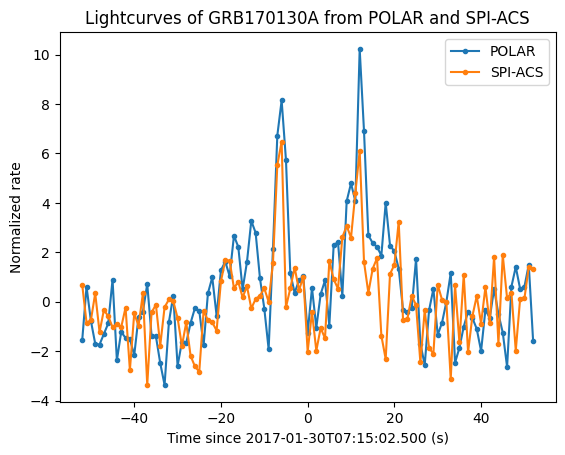

In [20]:
# The time in the polar lightcurve is the beginning of the bin, so we add half a bin to align with SPI-ACS
# We subtract the median to have both lightcurves centered on zero

plt.plot((ptime - spi_timezero + time_bin_polar*u.s/2).to('s'), 
         (pdat['rate']-np.median(pdat['rate']))/pdat['rate_err'], 
         '.-', label='POLAR')

# SPI-ACS lightcurve is for the centre of the bin
plt.plot((spi_time - spi_timezero).to('s'), 
         (sdat['RATE']-np.median(sdat['RATE']))/sdat['ERROR'], 
         '.-', label='SPI-ACS')

plt.xlabel('Time since '+spi_timezero.isot+' (s)')
plt.ylabel('Normalized rate')
plt.title(f'Lightcurves of {src_name} from POLAR and SPI-ACS')
plt.legend()

plt.savefig('spi_polar_norm_lc.png')

In [21]:
# convenience variable for ODA
outp = PictureProduct.from_file('spi_polar_norm_lc.png')

In [22]:
# This annotated cell is to let ODA know that the final output is a picture product
combined_lc = outp # oda:ODAPictureProduct

## The following code is a demonstration of the plotting

In [23]:
import oda_api.plot_tools as oda_plot

# This is to ensure the last version of the module is loaded in development
from importlib import reload
reload(oda_plot)

<module 'oda_api.plot_tools' from '/home/ferrigno/Soft/oda_api/oda_api/plot_tools.py'>

/home/ferrigno/Soft/oda_api/oda_api/plot_tools.py:599: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.show()


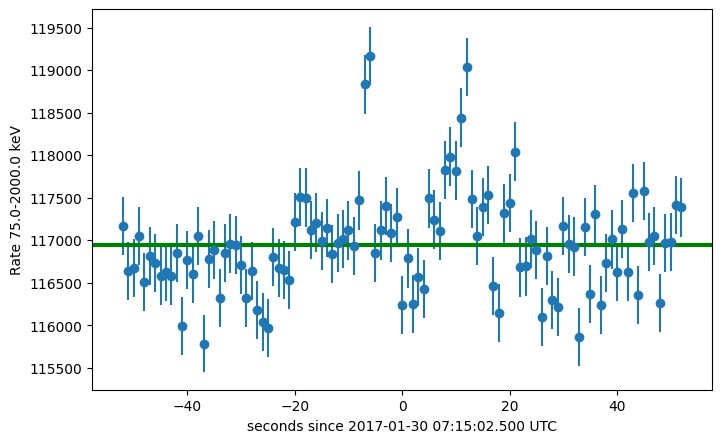

In [24]:
lc_acs = oda_plot.OdaLightCurve(data_collection_spi)
lc_acs.show()

No instrument in data collection


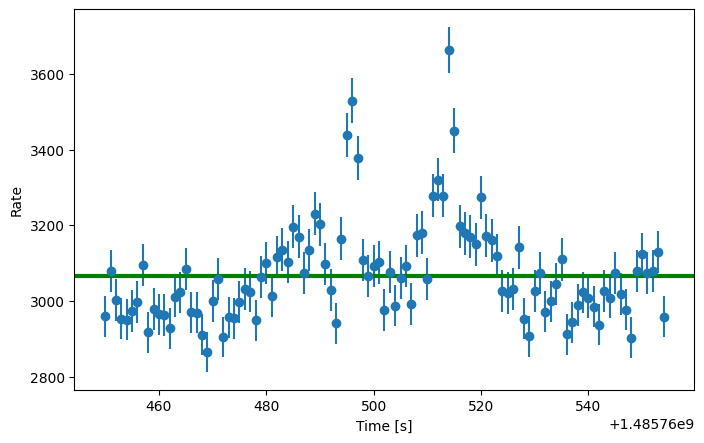

In [25]:
lc_polar= oda_plot.OdaLightCurve(data_collection_polar)
lc_polar.show()